# Minimizing the generalized Rosenbrock function

Suppose that we wish to minimize the ‘generalized Rosenbrock’ function using
bound constrained optimization.

Interfaces to the NAG Library are provided in the ``naginterfaces.library``
subpackage

One can see from the HTML documentation at https://www.nag.com/numeric/py/nagdoc_latest/naginterfaces.library.html that the relevant algorithmic submodule for (local) optimization is ``opt``.

Studying the `opt` Functionality Index confirms that the relevant optimization solver to call is
``bounds_quasi_func_easy``. The HTML documentation for this solver is at https://www.nag.com/numeric/py/nagdoc_latest/naginterfaces.library.opt.html#naginterfaces.library.opt.bounds_quasi_func_easy.

The optimization solver may be imported directly if desired

In [1]:
from naginterfaces.library.opt import bounds_quasi_func_easy

Now define the optimization problem: first, the objective function for the
generalized Rosenbrock problem. From the documented signature of the NAG routine

In [2]:
help(bounds_quasi_func_easy)

Help on function bounds_quasi_func_easy in module naginterfaces.library.opt:

bounds_quasi_func_easy(ibound, funct1, bl, bu, x, liw=None, lw=None, data=None)
    Bound constrained minimum, quasi-Newton algorithm, using function
    values only (easy-to-use).
    
    For full information please refer to the NAG Library document for
    e04jy
    
    https://www.nag.com/numeric/fl/nagdoc_fl26.2/html/e04/e04jyf.html
    
    Parameters
    ----------
    ibound : int
        Indicates whether the facility for dealing with bounds of
        special forms is to be used.
    
        It must be set to one of the following values:
    
        - `ibound` = 0 If you are supplying all the l_j and u_j
          individually.
    
        - `ibound` = 1 If there are no bounds on any x_j.
    
        - `ibound` = 2 If all the bounds are of the form 0 <= x_j.
    
        - `ibound` = 3 If l_1 = l_2 = ... = l_n and u_1 = u_2 = ... =
          u_n.
    
    funct1 : callable fc = funct1(xc, data=

we can infer that parameter ``funct1`` may be specified as a
lambda expression in our case, where we do not have any communication data
(``data``) to pass to the function

In [3]:
rosen = lambda x: (sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1.0-x[:-1])**2.0))

Here is a contour plot of the function:

In [4]:
# Jupyter magic for displaying figures inline:
%matplotlib inline

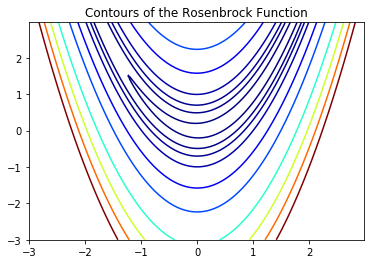

In [5]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

delta = 0.025
x = np.arange(-3., 3., delta)
y = np.arange(-3., 3., delta)
X, Y = np.meshgrid(x, y)
Z = np.empty((len(X), len(Y)))
for i, x_i in enumerate(x):
    for j, y_j in enumerate(y):
        Z[j, i] = rosen(np.array([x_i, y_j]))

ax = plt.axes()
ax.contour(
    X, Y, Z,
    levels=[5, 25, 50, 100, 250, 500, 1000, 1500, 2000, 2500],
    cmap=cm.jet,
)
ax.set_title('Contours of the Rosenbrock Function')

plt.show()

Then define an initial guess for the optimization. In the
``naginterfaces.library`` subpackage input array data may be supplied in any
‘array-like’ container, as noted above in the ``float, array-like, shape (n)``
specification for argument ``x``. For our one-dimensional ``x``, this means
that any sequence of data will be a suitable container, as will a
``numpy.ndarray``.
(In functions taking multi-dimensional data, nested sequences and again
instances of ``numpy.ndarray`` are valid.) Furthermore, the shape (length) of
the ``x`` we supply determines the (inferred) value of ``n`` for the problem.

Our chosen start point is $(0., 0., 0., 0.)$ and thus any of the
following may be used to supply the ‘array-like’ vector ``x``:

- as a ``list``


In [6]:
x = [0.]*4

- as a ``tuple``

In [7]:
x = (0., 0., 0., 0.)

- as an ``ndarray``


In [8]:
x = np.array([0.]*4)

Now define box bounds for the problem

In [9]:
n = len(x)
bl, bu = [0.0]*n, [2.0]*n
ibound = 0

Minimize the problem

In [10]:
opt_soln = bounds_quasi_func_easy(ibound, rosen, bl, bu, x)

Arguments returned by the NAG routine can be accessed as named fields of the return tuple.

Display the results

In [11]:
print('Function value at lowest point found is {:.5f}.'.format(opt_soln.f))
print('The corresponding x is (' + ', '.join(['{:.4f}'] * n).format(*opt_soln.x) + ').')

Function value at lowest point found is 0.00000.
The corresponding x is (1.0000, 1.0000, 1.0000, 1.0000).
